# EDA

### Load the datasets

In [2]:
import pandas as pd

# Load features data
features_df = pd.read_csv('data/features.csv')

# Load stores data
stores_df = pd.read_csv('data/stores.csv')

# Load train data
train_df = pd.read_csv('data/train.csv')

# Load test data
test_df = pd.read_csv('data/test.csv')

### Datasets Preview

In [3]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2/5/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2/12/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2/19/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2/26/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,3/5/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


### Preprocessing

In [7]:
features_df['Date'] = pd.to_datetime(features_df['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

In [8]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
features_df[markdown_cols] = features_df[markdown_cols].fillna(0)

In [9]:
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [10]:
merged_df = pd.merge(train_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')

In [11]:
merged_df = pd.merge(merged_df, stores_df, on='Store', how='left')

In [12]:
missing_summary = merged_df.isnull().sum()
print(missing_summary[missing_summary > 0])

Series([], dtype: int64)


### Basic EDA

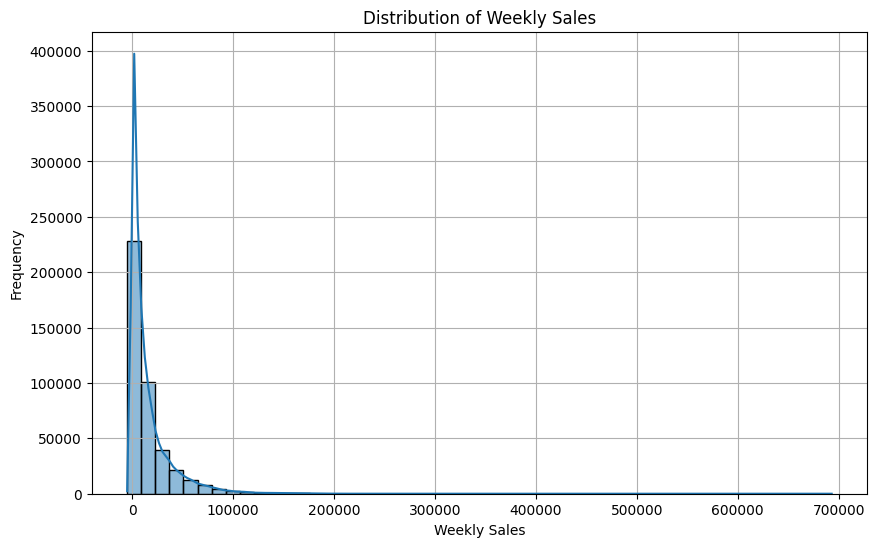

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Weekly_Sales'], bins=50, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

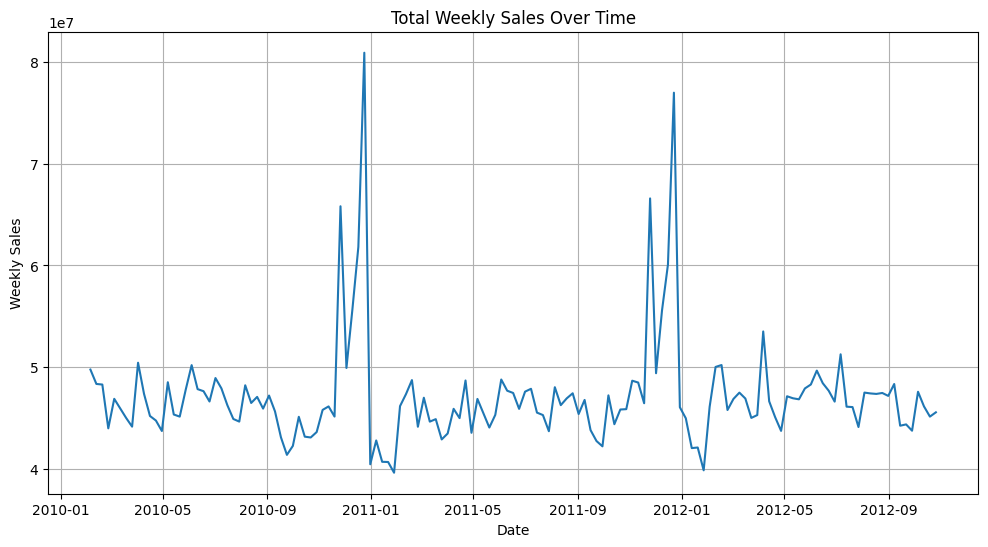

In [17]:
# Grouping by date to get total sales across all stores
sales_over_time = merged_df.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_over_time, x='Date', y='Weekly_Sales')
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4124\3685115110.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stores.index, y=top_stores.values, palette="viridis")


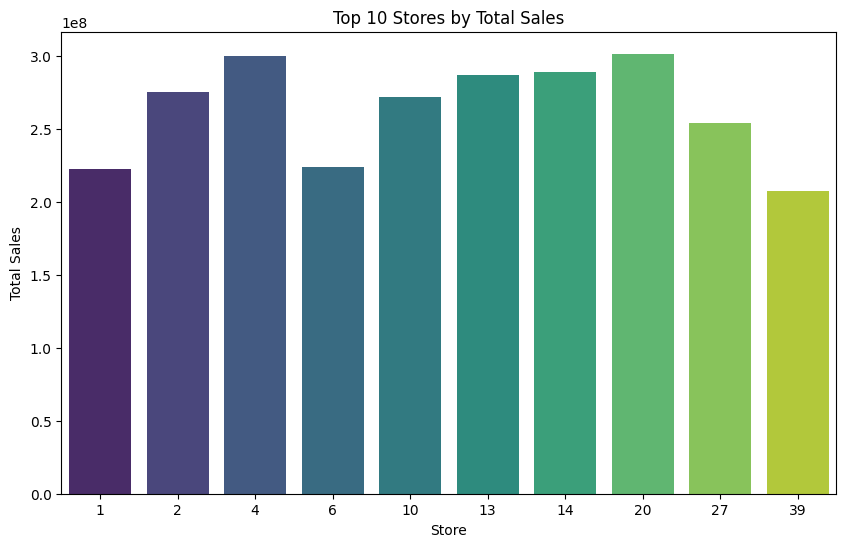

In [18]:
top_stores = merged_df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_stores.index, y=top_stores.values, palette="viridis")
plt.title('Top 10 Stores by Total Sales')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4124\3634541214.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_depts.index, y=top_depts.values, palette="mako")


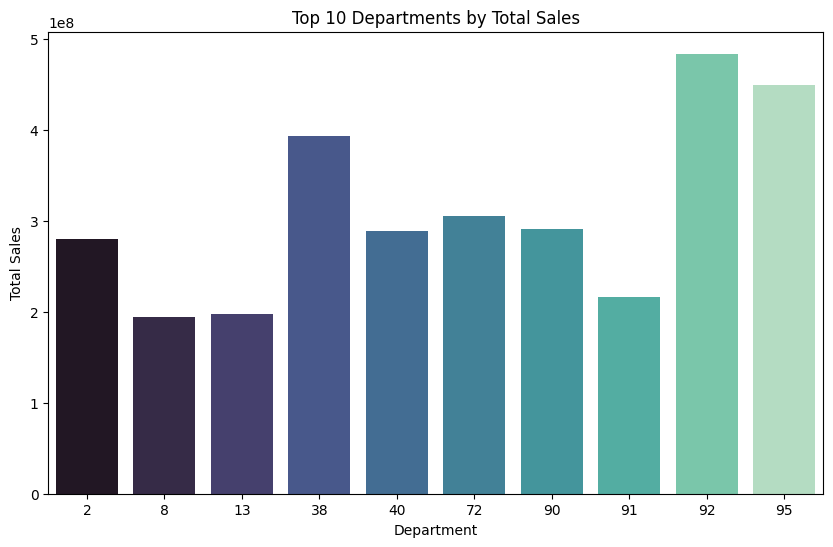

In [19]:
top_depts = merged_df.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_depts.index, y=top_depts.values, palette="mako")
plt.title('Top 10 Departments by Total Sales')
plt.xlabel('Department')
plt.ylabel('Total Sales')
plt.show()

### Feature Engineering

In [20]:
merged_df['Week'] = merged_df['Date'].dt.isocalendar().week
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Year'] = merged_df['Date'].dt.year

In [21]:
merged_df = merged_df.sort_values(['Store', 'Dept', 'Date'])

# Lag by 1 and 2 weeks
merged_df['Weekly_Sales_lag1'] = merged_df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)
merged_df['Weekly_Sales_lag2'] = merged_df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(2)

In [22]:
# 4-week rolling average of past weekly sales
merged_df['rolling_avg_4w'] = (
    merged_df.groupby(['Store', 'Dept'])['Weekly_Sales']
    .transform(lambda x: x.shift(1).rolling(window=4).mean())
)

In [23]:
merged_df['rolling_max_4w'] = (
    merged_df.groupby(['Store', 'Dept'])['Weekly_Sales']
    .transform(lambda x: x.shift(1).rolling(window=4).max())
)

In [24]:
# 4-week rolling average of past weekly sales
merged_df['rolling_avg_8w'] = (
    merged_df.groupby(['Store', 'Dept'])['Weekly_Sales']
    .transform(lambda x: x.shift(1).rolling(window=4).mean())
)

In [25]:
merged_df['rolling_max_8w'] = (
    merged_df.groupby(['Store', 'Dept'])['Weekly_Sales']
    .transform(lambda x: x.shift(1).rolling(window=8).max())
)

In [26]:
merged_df['IsHoliday'] = merged_df['IsHoliday'].astype(int)

In [27]:
merged_df['Weekly_Sales_lag1'] = merged_df.groupby('Store')['Weekly_Sales_lag1'].transform(
    lambda x: x.fillna(x.mean())
)
merged_df['Weekly_Sales_lag2'] = merged_df.groupby('Store')['Weekly_Sales_lag2'].transform(
    lambda x: x.fillna(x.mean())
)
merged_df['rolling_avg_4w'] = merged_df.groupby('Store')['rolling_avg_4w'].transform(
    lambda x: x.fillna(x.mean())
)
merged_df['rolling_max_4w'] = merged_df.groupby('Store')['rolling_max_4w'].transform(
    lambda x: x.fillna(x.mean())
)
merged_df['rolling_avg_8w'] = merged_df.groupby('Store')['rolling_avg_8w'].transform(
    lambda x: x.fillna(x.mean())
)
merged_df['rolling_max_8w'] = merged_df.groupby('Store')['rolling_max_8w'].transform(
    lambda x: x.fillna(x.mean())
)

In [28]:
merged_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Size,Week,Month,Year,Weekly_Sales_lag1,Weekly_Sales_lag2,rolling_avg_4w,rolling_max_4w,rolling_avg_8w,rolling_max_8w
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,...,151315,5,2,2010,21727.986241,21744.244475,21745.575857,24834.479474,21745.575857,26796.319569
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,...,151315,6,2,2010,24924.500000,21744.244475,21745.575857,24834.479474,21745.575857,26796.319569
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,...,151315,7,2,2010,46039.490000,24924.500000,21745.575857,24834.479474,21745.575857,26796.319569
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,...,151315,8,2,2010,41595.550000,46039.490000,21745.575857,24834.479474,21745.575857,26796.319569
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,...,151315,9,3,2010,19403.540000,41595.550000,32990.770000,46039.490000,32990.770000,26796.319569


### Group based analysis

C:\Users\Admin\AppData\Local\Temp\ipykernel_4124\3546244546.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_sales.index, y=store_sales.values, palette="Blues_d")


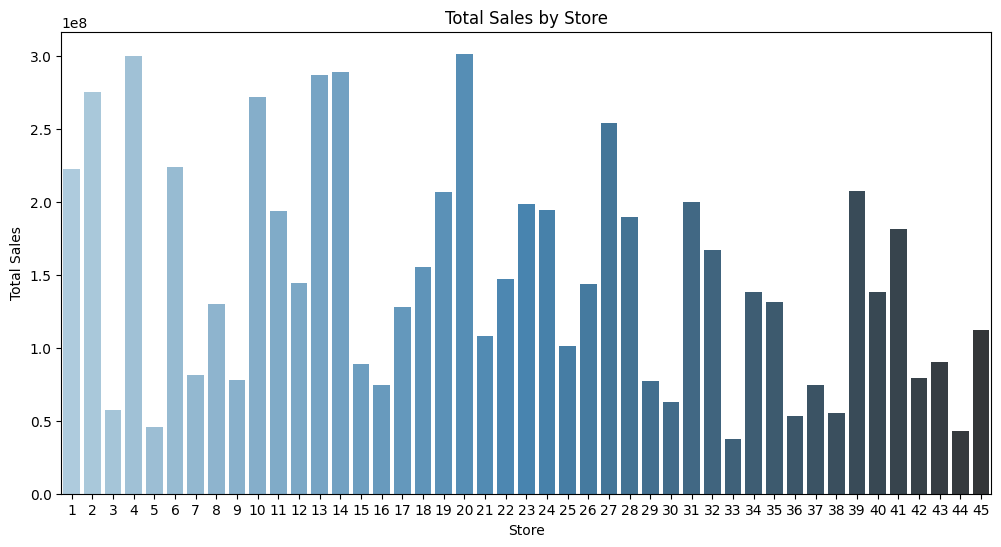

In [29]:
store_sales = merged_df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=store_sales.index, y=store_sales.values, palette="Blues_d")
plt.title("Total Sales by Store")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4124\560014317.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_sales.index, y=dept_sales.values, palette="Purples_d")


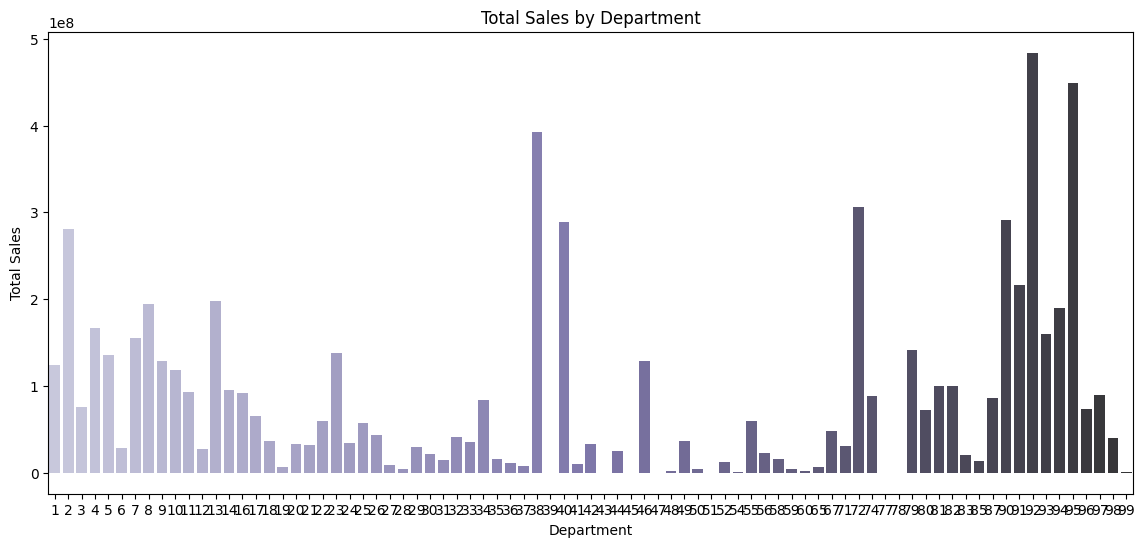

In [30]:
dept_sales = merged_df.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=dept_sales.index, y=dept_sales.values, palette="Purples_d")
plt.title("Total Sales by Department")
plt.xlabel("Department")
plt.ylabel("Total Sales")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_4124\1576674777.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IsHoliday', y='Weekly_Sales', data=holiday_sales, palette='muted')


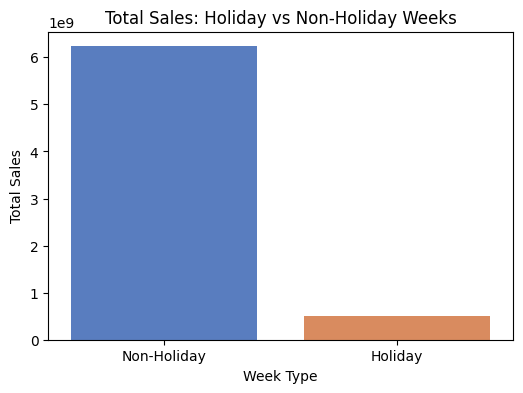

In [31]:
holiday_sales = merged_df.groupby('IsHoliday')['Weekly_Sales'].sum().reset_index()
holiday_sales['IsHoliday'] = holiday_sales['IsHoliday'].map({0: 'Non-Holiday', 1: 'Holiday'})

plt.figure(figsize=(6, 4))
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=holiday_sales, palette='muted')
plt.title("Total Sales: Holiday vs Non-Holiday Weeks")
plt.xlabel("Week Type")
plt.ylabel("Total Sales")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4124\328470386.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Weekly_Sales', data=type_sales, palette="Set2")


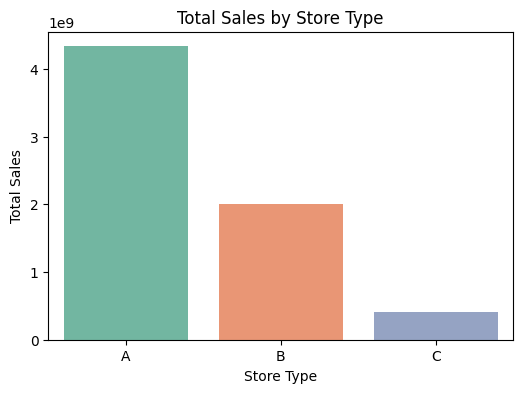

In [32]:
type_sales = merged_df.groupby('Type')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='Type', y='Weekly_Sales', data=type_sales, palette="Set2")
plt.title("Total Sales by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Total Sales")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4124\366208594.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_sales = merged_df.groupby('Size_Category')['Weekly_Sales'].sum().reset_index()
C:\Users\Admin\AppData\Local\Temp\ipykernel_4124\366208594.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Size_Category', y='Weekly_Sales', data=size_sales, palette="coolwarm")


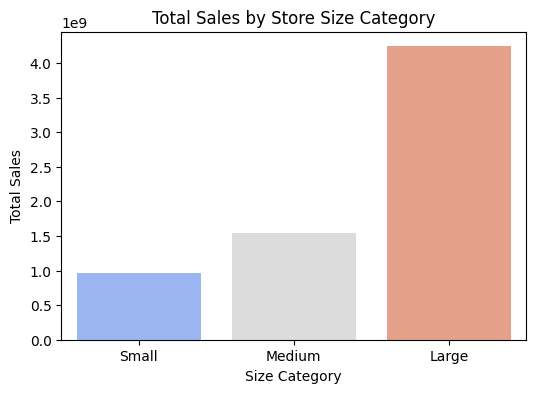

In [33]:
# Optional: Categorize into small/medium/large
merged_df['Size_Category'] = pd.cut(
    merged_df['Size'],
    bins=[0, 100000, 150000, float('inf')],
    labels=['Small', 'Medium', 'Large']
)

size_sales = merged_df.groupby('Size_Category')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='Size_Category', y='Weekly_Sales', data=size_sales, palette="coolwarm")
plt.title("Total Sales by Store Size Category")
plt.xlabel("Size Category")
plt.ylabel("Total Sales")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4124\3809205547.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=holiday_avg_sales, x='Holiday', y='Weekly_Sales', palette='plasma')


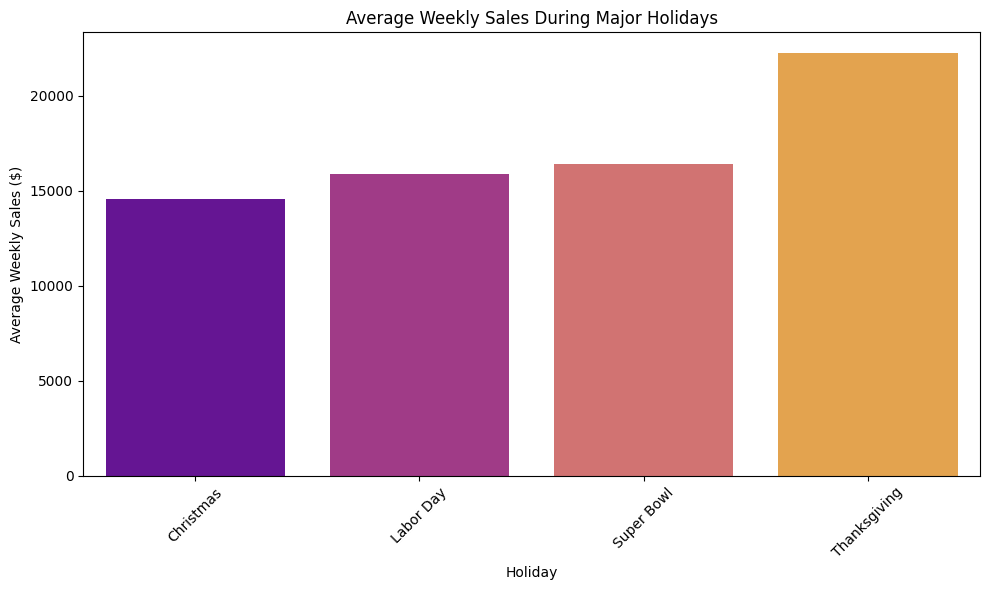

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Date is in datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Define holiday dates
holiday_dates = {
    'Super Bowl': ['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08'],
    'Labor Day': ['2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06'],
    'Thanksgiving': ['2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29'],
    'Christmas': ['2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27']
}

# Create a DataFrame of holiday dates
holiday_records = []
for holiday, dates in holiday_dates.items():
    for date in dates:
        holiday_records.append({'Date': pd.to_datetime(date), 'Holiday': holiday})

holiday_df = pd.DataFrame(holiday_records)

# Merge with merged_df to get sales data for holiday weeks
holiday_sales = pd.merge(merged_df, holiday_df, on='Date', how='inner')

# Calculate average weekly sales for each holiday
holiday_avg_sales = holiday_sales.groupby('Holiday')['Weekly_Sales'].mean().reset_index()

# Plot the result
plt.figure(figsize=(10, 6))
sns.barplot(data=holiday_avg_sales, x='Holiday', y='Weekly_Sales', palette='plasma')
plt.title('Average Weekly Sales During Major Holidays')
plt.ylabel('Average Weekly Sales ($)')
plt.xlabel('Holiday')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

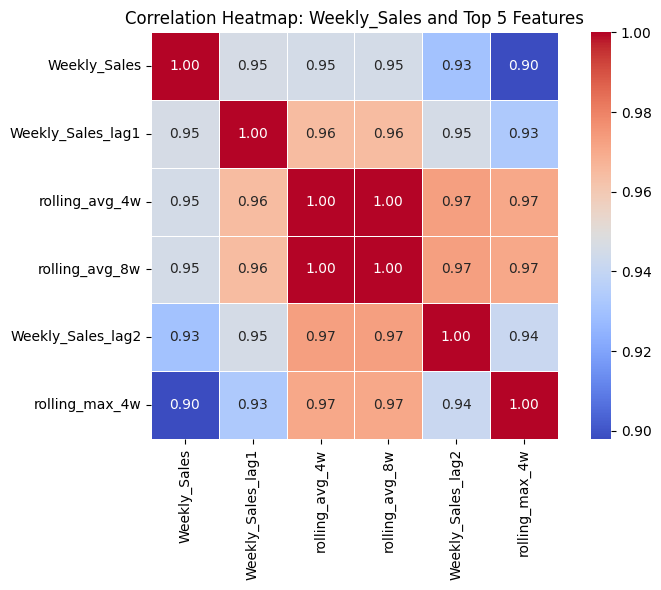

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select numeric columns
numeric_df = merged_df.select_dtypes(include=['int64', 'float64', 'uint32', 'int32'])

# Step 2: Compute correlation with Weekly_Sales
correlations = numeric_df.corr()['Weekly_Sales'].drop('Weekly_Sales')

# Step 3: Get top 8 most correlated features (absolute value for ranking)
top_features = correlations.abs().sort_values(ascending=False).head(5).index.tolist()

# Step 4: Add Weekly_Sales to list for heatmap
top_features = ['Weekly_Sales'] + top_features

# Step 5: Create correlation matrix for these features
top_corr_matrix = numeric_df[top_features].corr()

# Step 6: Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=.5)
plt.title("Correlation Heatmap: Weekly_Sales and Top 5 Features")
plt.tight_layout()
plt.show()

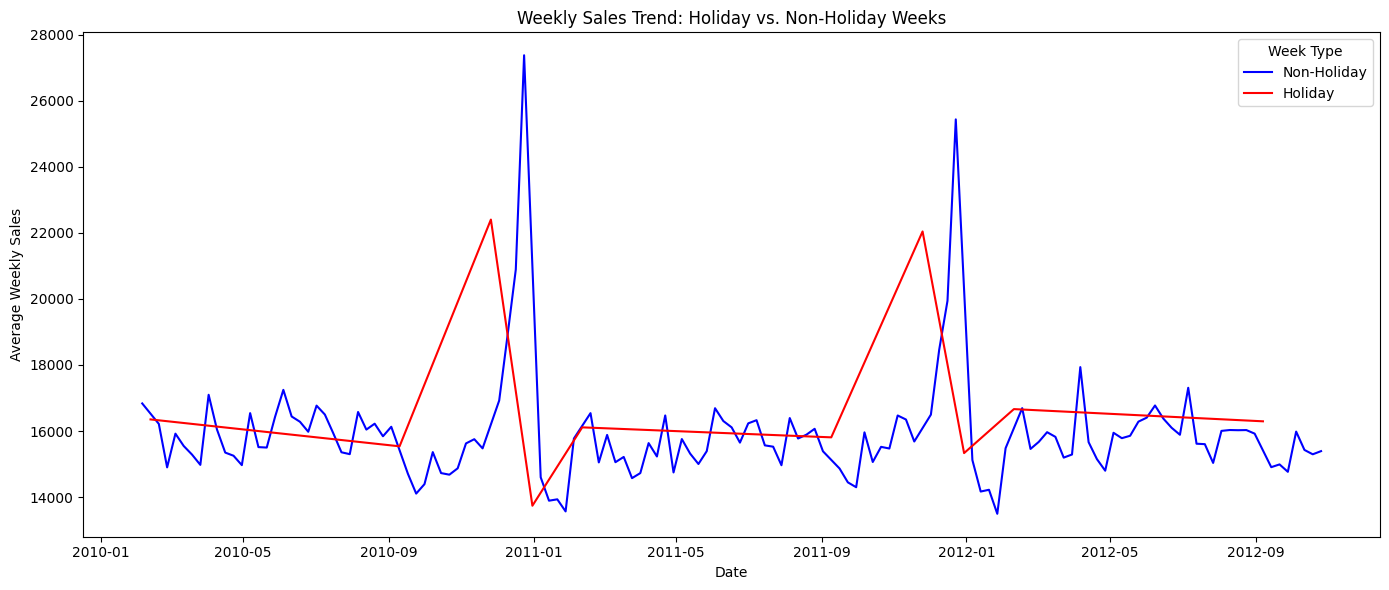

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Date and Holiday status, then calculate average weekly sales
sales_trend = merged_df.groupby(['Date', 'IsHoliday'])['Weekly_Sales'].mean().reset_index()

# Map IsHoliday 0/1 to readable labels
sales_trend['Holiday Label'] = sales_trend['IsHoliday'].map({0: 'Non-Holiday', 1: 'Holiday'})

# Plotting
plt.figure(figsize=(14, 6))
sns.lineplot(data=sales_trend, x='Date', y='Weekly_Sales', hue='Holiday Label', palette=['blue', 'red'])
plt.title('Weekly Sales Trend: Holiday vs. Non-Holiday Weeks')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')
plt.legend(title='Week Type')
plt.tight_layout()
plt.show()

In [37]:
merged_df.to_csv("data/merged.csv", index=False)

In [38]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Store              421570 non-null  int64         
 1   Dept               421570 non-null  int64         
 2   Date               421570 non-null  datetime64[ns]
 3   Weekly_Sales       421570 non-null  float64       
 4   IsHoliday          421570 non-null  int64         
 5   Temperature        421570 non-null  float64       
 6   Fuel_Price         421570 non-null  float64       
 7   MarkDown1          421570 non-null  float64       
 8   MarkDown2          421570 non-null  float64       
 9   MarkDown3          421570 non-null  float64       
 10  MarkDown4          421570 non-null  float64       
 11  MarkDown5          421570 non-null  float64       
 12  CPI                421570 non-null  float64       
 13  Unemployment       421570 non-null  float64 